In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as swt
from pandas_profiling import ProfileReport
import dtale

In [42]:
#do the same for the test data set also, so that import csv name only change from below as well as when exporting as csv too
# df_raw = pd.read_csv('train.csv')
df_raw = pd.read_csv('test.csv')
df_raw.head()

,ID,stock,Date,holiday,unpredictability_score
0,id_713,0,2019-11-01,0,7
1,id_714,0,2019-11-04,0,7
2,id_715,0,2019-11-05,0,7
3,id_716,0,2019-11-06,0,7
4,id_717,0,2019-11-07,0,7


In [3]:
# report_bigmart = ProfileReport(df_raw, explorative=True)
# report_bigmart.to_widgets()

In [43]:
dtale.show(df_raw)

In [44]:
#drop item identifier columns
df_raw = df_raw.drop(['ID'], axis=1)

In [45]:
df_raw.head()

,stock,Date,holiday,unpredictability_score
0,0,2019-11-01,0,7
1,0,2019-11-04,0,7
2,0,2019-11-05,0,7
3,0,2019-11-06,0,7
4,0,2019-11-07,0,7


In [46]:
df_raw['holiday'].unique()

array([0, 1])

In [47]:
df_raw.isnull().sum()

stock                     0
Date                      0
holiday                   0
unpredictability_score    0
dtype: int64

In [48]:
df_raw['stock'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102])

In [6]:
# df_raw['Outlet_Identifier'].unique()

In [7]:
# df_raw['Outlet_Location_Type'].unique()

In [8]:
# sns.scatterplot(data = df_raw, x = 'Outlet_Size', y='Outlet_Location_Type')

In [9]:
# sns.scatterplot(data = df_raw, x = 'Outlet_Identifier', y='Outlet_Location_Type')

In [10]:
# sns.scatterplot(data = df_raw, x = 'Outlet_Identifier', y='Outlet_Size')

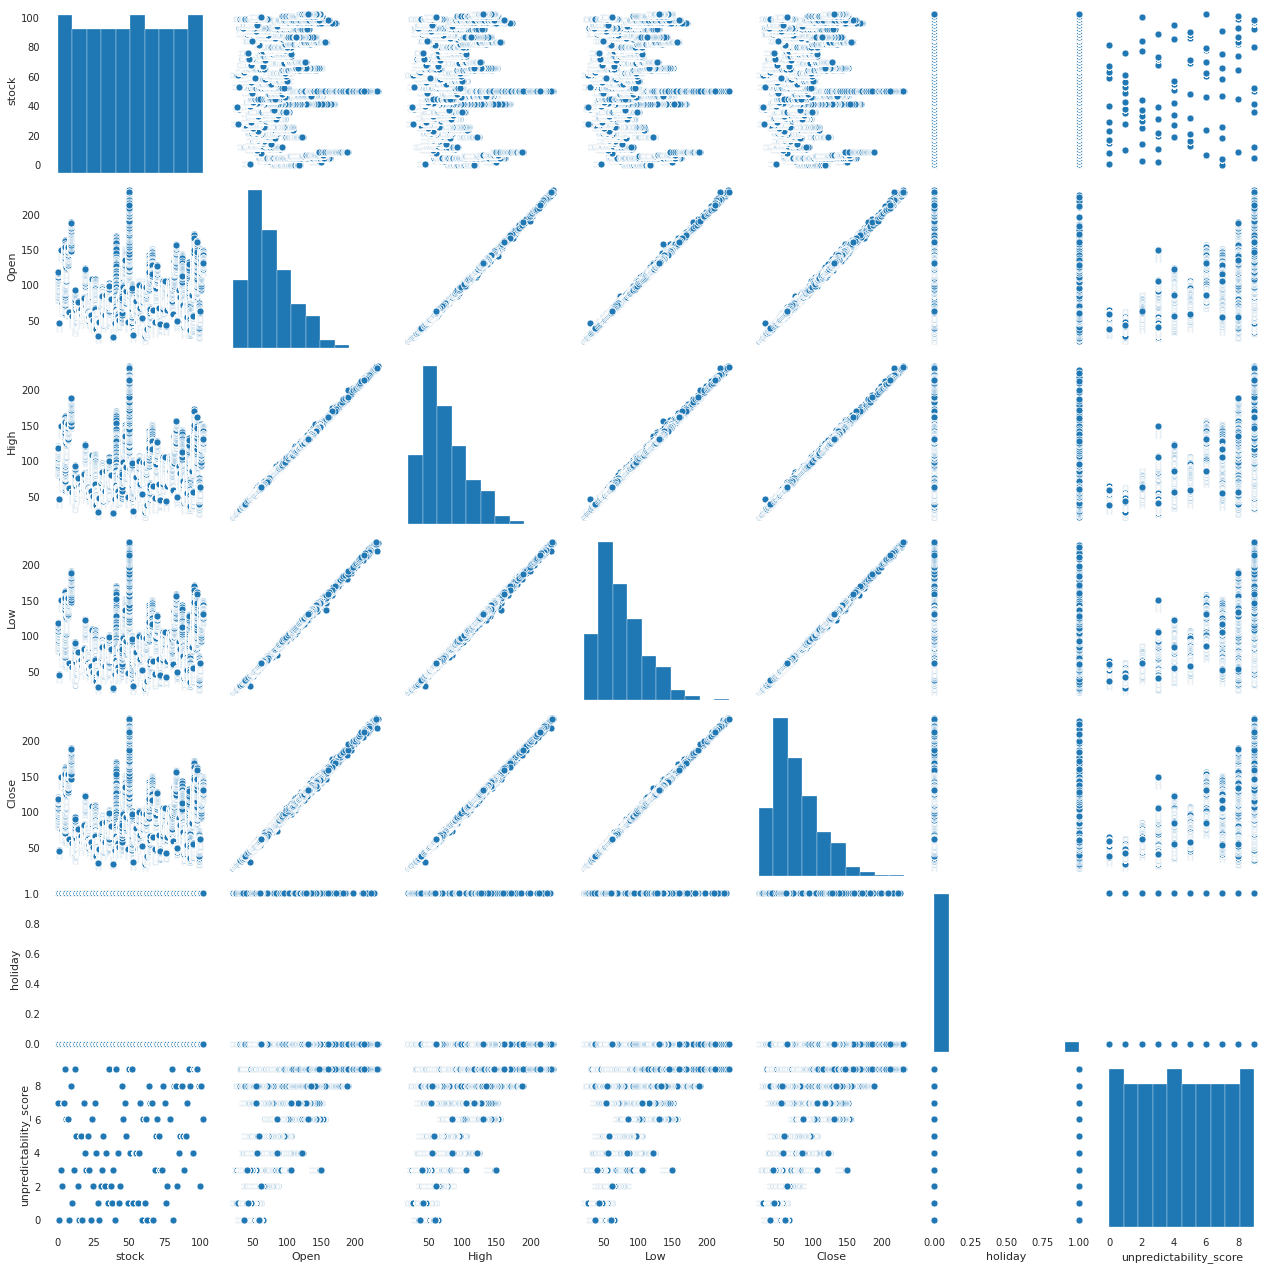

In [11]:
sns.pairplot(df_raw, palette='coolwarm')

In [12]:
# g = sns.PairGrid(df_raw)
# g.map(plt.scatter)

In [13]:
# gb_outlet = df_raw.groupby(['Outlet_Identifier'])['Outlet_Size']

In [14]:
# print(list(gb_outlet))

In [15]:
# gb_outlet_loc = df_raw.groupby(['Outlet_Location_Type'])['Outlet_Size']
# gb_outlet_loc = df_raw.groupby(['Outlet_Size'])['Outlet_Location_Type']

In [16]:
# print(list(gb_outlet_loc))

In [17]:
# sns.distplot(df_raw['Item_Weight'])

In [18]:
# plt.figure(figsize=(24,8))
# sns.scatterplot(data = df_raw, x = 'Item_Type', y='Item_Weight')

In [19]:
# gb_itemWeight = df_raw.groupby(['Item_Weight'])['Item_Type']

In [20]:
# print(list(gb_itemWeight))

In [21]:
# df_raw['Item_Weight'].unique()

In [25]:
#finaly we can fill item weights nulls with the meadian, and the other size 
#should be reconsidered the actions we can take for the null filling statergies

In [22]:
#add another column to fill to make available the null values 
# df_raw['Item_Weight_null'] = np.where(df_raw['Item_Weight'].isnull(), 1,0)
# df_raw['Outlet_Size_null'] = np.where(df_raw['Outlet_Size'].isnull(), 1,0)

In [23]:
# df_raw.head()

In [28]:
#now we can do anything to the null values and let know if changes affect the model
#check if outliers available in the item wieght cat


In [24]:
#fill na for weights by the median
# df_raw['Item_Weight'] = df_raw['Item_Weight'].fillna(df_raw['Item_Weight'].median())

In [25]:
# df_raw['Item_Weight'].isnull().sum()

In [26]:
#fill the categorical variables for the size of the outlet
# df_raw['Outlet_Size'].mode()

In [27]:
# df_raw[df_raw['Outlet_Size'].isnull()]

In [28]:
#fill up the outlet size with the mode
# df_raw['Outlet_Size'] = df_raw['Outlet_Size'].fillna('Medium')
# df_raw.head()

In [34]:
#Filling the Missing Sizes based on the location tiers


In [49]:
df_raw_m = df_raw.copy()

In [50]:
df_raw_m.head()

,stock,Date,holiday,unpredictability_score
0,0,2019-11-01,0,7
1,0,2019-11-04,0,7
2,0,2019-11-05,0,7
3,0,2019-11-06,0,7
4,0,2019-11-07,0,7


In [51]:
df_raw_m = df_raw_m.drop(['Date'], axis=1)

In [52]:
df_raw_m.head()

,stock,holiday,unpredictability_score
0,0,0,7
1,0,0,7
2,0,0,7
3,0,0,7
4,0,0,7


#### checking for categorical data and replacments

In [53]:
df_raw_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4223 entries, 0 to 4222
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   stock                   4223 non-null   int64
 1   holiday                 4223 non-null   int64
 2   unpredictability_score  4223 non-null   int64
dtypes: int64(3)
memory usage: 99.1 KB


In [15]:
# df_raw_m['Item_Fat_Content'].unique()

In [16]:
# df_raw_m['Item_Type'].unique()

In [17]:
# df_raw_m['Outlet_Establishment_Year'].unique()

In [18]:
# df_raw_m['Outlet_Type'].unique()

In [54]:
#get the dummy variables without any special formating as the startup base
dummies = pd.get_dummies(df_raw_m, columns=['holiday'], drop_first=True)

In [61]:
dummies

,stock,unpredictability_score,holiday_1
0,0,7,0
1,0,7,0
2,0,7,0
3,0,7,0
4,0,7,0
...,...,...,...
4218,102,6,0
4219,102,6,1
4220,102,6,0
4221,102,6,0


In [62]:
df_dummy = dummies.copy()

In [63]:

df_dummy.head()

,stock,unpredictability_score,holiday_1
0,0,7,0
1,0,7,0
2,0,7,0
3,0,7,0
4,0,7,0


In [64]:
#### import procesed data into csv so that easy for the modeling
# df_dummy.to_csv('train_prep_1.csv')
df_dummy.to_csv('test_prep_1.csv')

#### Train test split for the data set

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df_dummy.drop('Close', axis=1)
y = df_dummy['Close']

In [25]:
#as this has different test data set we can import that as our test sample
X

,stock,Open,High,Low,unpredictability_score,holiday_1
0,0,82.9961,82.7396,82.9144,7,1
1,0,83.1312,83.1669,83.3779,7,0
2,0,82.6622,82.7634,82.8984,7,0
3,0,83.0279,82.7950,82.8425,7,0
4,0,82.3761,82.0828,82.1473,7,0
...,...,...,...,...,...,...
73434,102,129.7152,130.4687,130.7243,6,0
73435,102,131.2933,131.5415,132.3108,6,0
73436,102,131.1130,131.6313,131.7669,6,0
73437,102,131.6991,131.0926,131.8122,6,0


In [26]:
#here for the sake of the model now we just use the test samples from the train set as the base mode

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(len(X_train))
print(len(X_test))

51407
22032


#### scaling the data

In [28]:
#doing the standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
# df_scale = df_dummy.copy()
# df_scale

In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [26]:
# X_test

In [27]:
# print(X_test)
# print(len(X_test))

In [28]:
# now that the scling is done we can train the model

### Taining the model

### Using other popular Regression Models 

#### Regressors
1.    svm.SVR(),
2.   linear_model.SGDRegressor(),
3.    linear_model.BayesianRidge(),
4.    linear_model.LassoLars(),
5.    linear_model.ARDRegression(),
6.    linear_model.PassiveAggressiveRegressor(),
7.    linear_model.TheilSenRegressor(),
8.   linear_model.LinearRegression()

In [33]:
import numpy as np
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics
regressors = [
#     svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
#     linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

for item in regressors:
    print(item)
    clf = item
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print(preds,'\n''\n')
#     df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': preds.flatten()})
#     print(df,'\n''\n')
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
    print('\n''\n''\n')
    

SGDRegressor()
[ 43.34048586  81.01212203  48.68943651 ... 126.18283403 121.6716096
  40.63454489] 


Mean Absolute Error: 0.42143588439303437
Mean Squared Error: 0.3612534896886762
Root Mean Squared Error: 0.6010436670398218




BayesianRidge()
[ 43.40767592  81.24173838  48.63249026 ... 126.17874155 121.15780333
  40.62600586] 


Mean Absolute Error: 0.3716062822982909
Mean Squared Error: 0.23890301653396276
Root Mean Squared Error: 0.4887770622011253




LassoLars()
[75.59440394 75.59440394 75.59440394 ... 75.59440394 75.59440394
 75.59440394] 


Mean Absolute Error: 26.216208941117454
Mean Squared Error: 1072.1121349262705
Root Mean Squared Error: 32.74312347541496




ARDRegression()
[ 43.40889024  81.2398705   48.6391574  ... 126.17558696 121.15884357
  40.6340726 ] 


Mean Absolute Error: 0.37183759070662187
Mean Squared Error: 0.23892938303288808
Root Mean Squared Error: 0.48880403336397305




PassiveAggressiveRegressor()
[ 43.30770671  81.15659632  48.54118301 ... 125.7189354

### Use Desicion tree Regressor


In [34]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor(max_depth=3)

In [38]:
model_tree.fit(X_train, y_train)
preds_tree = model_tree.predict(X_test)
print(preds_tree,'\n''\n')
# df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': preds_tree.flatten()})
# print(df,'\n''\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds_tree))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds_tree))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds_tree)))
print('\n''\n''\n')
    

[ 50.65971815  78.07487569  50.65971815 ... 135.68716235 135.68716235
  35.06303635] 


Mean Absolute Error: 4.560337111867569
Mean Squared Error: 32.94274910038628
Root Mean Squared Error: 5.739577432214525






#### Random forest regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor
model_forst = RandomForestRegressor(max_depth=3)

In [41]:
model_forst.fit(X_train, y_train)
preds_forst = model_forst.predict(X_test)
print(preds_forst,'\n''\n')
# df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': preds_forst.flatten()})
# print(df,'\n''\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds_forst))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds_forst))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds_forst)))
print('\n''\n''\n')
 

[ 49.81215103  78.19240616  50.59070065 ... 135.67162637 134.47128781
  35.04034501] 


Mean Absolute Error: 4.178410484782413
Mean Squared Error: 28.08704138921506
Root Mean Squared Error: 5.299720878425114






# First Submission

In [65]:
# import the two csv's
df_train_prep = pd.read_csv('train_prep_1.csv')
df_test_prep = pd.read_csv('test_prep_1.csv')

In [66]:
df_train_prep.head()

,Unnamed: 0,stock,Open,High,Low,Close,unpredictability_score,holiday_1
0,0,0,82.9961,82.7396,82.9144,82.8101,7,1
1,1,0,83.1312,83.1669,83.3779,82.9690,7,0
2,2,0,82.6622,82.7634,82.8984,82.8578,7,0
3,3,0,83.0279,82.7950,82.8425,82.7385,7,0
4,4,0,82.3761,82.0828,82.1473,81.8641,7,0


In [67]:
df_test_prep.head()

,Unnamed: 0,stock,unpredictability_score,holiday_1
0,0,0,7,0
1,1,0,7,0
2,2,0,7,0
3,3,0,7,0
4,4,0,7,0


In [68]:
df_train_prep = df_train_prep.drop(['Open','High', 'Low'], axis=1)

In [69]:
df_train_prep.head()

,Unnamed: 0,stock,Close,unpredictability_score,holiday_1
0,0,0,82.8101,7,1
1,1,0,82.9690,7,0
2,2,0,82.8578,7,0
3,3,0,82.7385,7,0
4,4,0,81.8641,7,0


In [70]:
#doing the standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [71]:
X_train = df_train_prep.drop('Close', axis=1)
X_test = df_test_prep
y_train = df_train_prep['Close']

In [72]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [74]:
# get the test original data set and preparing for submission
test_ori = pd.read_csv('test.csv', usecols=['ID'])
test_ori.head()

,ID
0,id_713
1,id_714
2,id_715
3,id_716
4,id_717


In [77]:
from sklearn import linear_model

model_baye = linear_model.BayesianRidge()
model_baye.fit(X_train, y_train)
pred_baye = model_baye.predict(X_test)

res_baye = pd.DataFrame(pred_baye)
# res_svm.index = test_ori.index 
res_baye.columns = ["Close"]
res_baye['ID'] = test_ori['ID']
# res_baye['Outlet_Identifier'] = test_ori['Outlet_Identifier']
# sub_svm_1 = pd.concat([res_svm, test_ori])
res_baye.head()
res_baye.to_csv('sub_res_baye_1.csv', index=False)

In [78]:
from sklearn import linear_model

model_SGD = linear_model.SGDRegressor()
model_SGD.fit(X_train, y_train)
pred_SGD = model_SGD.predict(X_test)

res_SGD = pd.DataFrame(pred_SGD)
# res_svm.index = test_ori.index 
res_SGD.columns = ["Close"]
res_SGD['ID'] = test_ori['ID']
# res_SGD['Outlet_Identifier'] = test_ori['Outlet_Identifier']
# sub_svm_1 = pd.concat([res_svm, test_ori])
res_SGD.head()
res_SGD.to_csv('base_sub_res_SGD_1.csv', index=False)

In [79]:
from sklearn import linear_model

model_lr = linear_model.LinearRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

res_lr = pd.DataFrame(pred_lr)
# res_svm.index = test_ori.index 
res_lr.columns = ["Close"]
res_lr['ID'] = test_ori['ID']
# res_SGD['Outlet_Identifier'] = test_ori['Outlet_Identifier']
# sub_svm_1 = pd.concat([res_svm, test_ori])
res_lr.head()
res_lr.to_csv('base_sub_res_lr_1.csv', index=False)

In [82]:
from sklearn import linear_model

model_ard = linear_model.ARDRegression()
model_ard.fit(X_train, y_train)
pred_ard = model_ard.predict(X_test)

res_ard = pd.DataFrame(pred_ard)
# res_svm.index = test_ori.index 
res_ard.columns = ["Close"]
res_ard['ID'] = test_ori['ID']
# res_SGD['Outlet_Identifier'] = test_ori['Outlet_Identifier']
# sub_svm_1 = pd.concat([res_svm, test_ori])
res_ard.head()
res_ard.to_csv('base_sub_res_ard_1.csv', index=False)

In [83]:
from sklearn import linear_model

model_pas = linear_model.PassiveAggressiveRegressor()
model_pas.fit(X_train, y_train)
pred_pas = model_pas.predict(X_test)

res_pas = pd.DataFrame(pred_pas)
# res_svm.index = test_ori.index 
res_pas.columns = ["Close"]
res_pas['ID'] = test_ori['ID']
# res_SGD['Outlet_Identifier'] = test_ori['Outlet_Identifier']
# sub_svm_1 = pd.concat([res_svm, test_ori])
res_pas.head()
res_pas.to_csv('base_sub_res_pas_1.csv', index=False)

In [84]:
from sklearn.ensemble import RandomForestRegressor
model_forst = RandomForestRegressor(max_depth=6)
model_forst.fit(X_train, y_train)
pred_forst = model_forst.predict(X_test)

res_forst = pd.DataFrame(pred_forst)
# res_svm.index = test_ori.index 
res_forst.columns = ["Close"]
res_forst['ID'] = test_ori['ID']
# res_SGD['Outlet_Identifier'] = test_ori['Outlet_Identifier']
# sub_svm_1 = pd.concat([res_svm, test_ori])
res_forst.head()
res_forst.to_csv('base_sub_res_forst_1.csv', index=False)

In [85]:
paramDT1={     "criterion": "mse",
              "min_samples_split": 250,#[i for i in range(3,500,10)],
              "max_depth": 6,# [i for i in range(2,,3)],
              "min_samples_leaf": 7,#[i for i in range(1,500,20)],
              "max_leaf_nodes": 130,#[i for i in range(2,100,20)],
              "max_features":'auto',# ['auto', 'sqrt', 'log2'],
              "n_estimators":100

              }

model_forest2= RandomForestRegressor(**paramDT1,random_state=101)
model_forest2.fit(X_train, y_train)
pred_forst2_1 = model_forest2.predict(X_test)


res_forst2_1 = pd.DataFrame(pred_forst2_1)
# res_svm.index = test_ori.index 
res_forst2_1.columns = ["Close"]
res_forst2_1['ID'] = test_ori['ID']
# res_SGD['Outlet_Identifier'] = test_ori['Outlet_Identifier']
# sub_svm_1 = pd.concat([res_svm, test_ori])
res_forst2_1.head()
res_forst2_1.to_csv('base_sub_res_forst2_1.csv', index=False)


In [86]:
from sklearn.ensemble import AdaBoostRegressor
dic1={'criterion': 'mse',
     'max_depth': 6,
      'min_samples_leaf': 5,
      #'min_samples_split': 3, 
      # 'max_leaf_nodes': 46, 
      #'max_features': 'log2', 
      'n_estimators': 100,
       #     'learning_rate': 0.0006, #(default=1.)
      #'loss': 'exponential',#},'linear',#'square', #
     }
rf1= RandomForestRegressor(random_state=101,**dic1)
regr_Ada_withRF = AdaBoostRegressor(rf1,random_state=101,n_estimators=100,learning_rate=0.0001)
regr_Ada_withRF.fit(X_train, y_train)
preds_AdaRF = regr_Ada_withRF.predict(X_test)


res_adaRF = pd.DataFrame(preds_AdaRF)
# res_svm.index = test_ori.index 
res_adaRF.columns = ["Close"]
res_adaRF['ID'] = test_ori['ID']
# res_SGD['Outlet_Identifier'] = test_ori['Outlet_Identifier']
# sub_svm_1 = pd.concat([res_svm, test_ori])
res_adaRF.head()
res_adaRF.to_csv('base_sub_res_adaRF_1.csv', index=False)

KeyboardInterrupt: 

In [87]:
import xgboost as xgb
from xgboost import XGBRegressor,plot_importance

param_grid2 = {
    # Parameters that we are going to tune.
    'silent':1,
    #'eta':1111111111,  # use less
    'njobs':-1,
   # 'subsample':0.5,
    # Other parameters
   'early_stopping_rounds':3,
   'n_estimators' : 1000,#135,
   'learning_rate': .07, # negativity correlated with n_estimators
    
    #'objective': 'reg:linear',#'reg:tweedie','reg:gamma'],
    'max_depth' :11,    
    "min_child_weight" : 255,
    #'max_leaf_nodes': 20  # enabling this will disable max_depth
    "reg_lambda":3000,  # ridge
    "reg_alpha":3000,  # lasso
    #"gamma" : 0.01,  #impactless
    "colsample_bytree" : 1,  # max features,
    "seed":45   
}
XGBReg_estimator = xgb.XGBRegressor(**param_grid2,random_state=25)
XGBReg_estimator.fit(X_train, y_train)
preds_XGBReg_es = XGBReg_estimator.predict(X_test)



res_XGBReg_es = pd.DataFrame(preds_XGBReg_es)
# res_svm.index = test_ori.index 
res_XGBReg_es.columns = ["Close"]
res_XGBReg_es['ID'] = test_ori['ID']
# res_SGD['Outlet_Identifier'] = test_ori['Outlet_Identifier']
# sub_svm_1 = pd.concat([res_svm, test_ori])
res_XGBReg_es.head()
res_XGBReg_es.to_csv('base_sub_res_XGBReg_es_1.csv', index=False)

2020-11-11 07:06:25,932 - INFO     - NumExpr defaulting to 4 threads.


[07:06:26] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, njobs, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Executing shutdown due to inactivity...


2020-11-11 07:26:38,291 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2020-11-11 07:26:38,319 - INFO     - Executing shutdown...
